# ANOVA

**In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. In other words, the ANOVA is used to test the difference between two or more means.**

**The one-way ANOVA compares the means of the groups you are interested in and determines whether any of those means are statistically different from each other.**

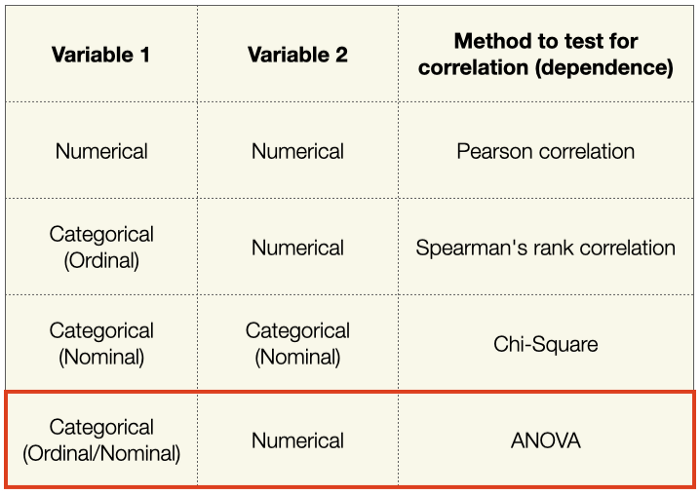

### f_oneway() function takes the group data as input and returns F-statistic and P-value

F-statistic, also known as F-value is used in ANOVA and regression analysis to identify the means between two populations are significantly different or not. In other words, F-statistic is the ratio of two variances (Variance is nothing but a measure of dispersion, it tells how far the data is dispersed from the mean)

In [65]:
import numpy as np
import pandas as pd

In [66]:
# Sudents grades average

a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]

# Salaries in 10,000s of 3 groups of Data Scientists with different backgrounds
#g1=[5,9,10,12,8,8,9]
#g2=[5,4, 4, 5,5,4,8]
#g3=[9,8, 5, 6,7,7,6]

list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


**Step 1: compute the average mark for each college like so:**

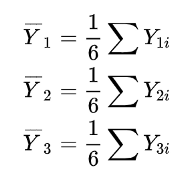

In [67]:
import numpy as np
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


**Step 2: compute the overall mean (k is the number of groups, hence in our case k=3):**

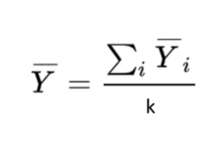

In [68]:
m=(m1+m2+m3)/3 
print('Overall mean: {}'.format(m))

Overall mean: 25.833333333333332


**Step 3: compute the ‘between-group’ sum of squared differences (where n is the number of observations per group/college, hence in our case n=6):**

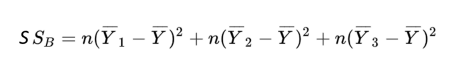

In [69]:
SSb=6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


**With those results, we can already compute one of the components of our F-score, which is the between-group mean square value (MSb). Indeed, knowing that the between-group degrees of freedom are k-1 (that means, one less than the number of groups), we can compute the MSb as:**

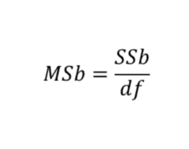

**Where df are the degrees of freedom.**

In [70]:
MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


**Step 4: calculate the “within-group” sum of squares.**

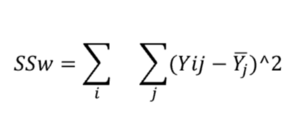

In [71]:
err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


**Again, knowing that there are k(n-1) within-group degrees of freedom (hence in our case 15), we can compute the within-group mean square value:**

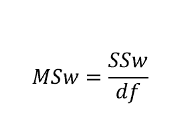

In [72]:
MSw=SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


**Step 5: compute the F-score:**

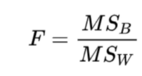

The F-value in an ANOVA is calculated as: variation between sample means / variation within the samples. The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples. The higher the F-value, the lower the corresponding p-value.

If the p-value is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and conclude that there is a statistically significant difference between group means.

In [73]:
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


**The F ratio is the ratio of two mean square values. If the null hypothesis is true, you expect F to have a value close to 1.0 most of the time. A large F ratio means that the variation among group means is more than you'd expect to see by chance.**

## One line of code to compute ANOVA

**Let’s double-check this value with scipy:**

In [74]:
import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

**We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.**

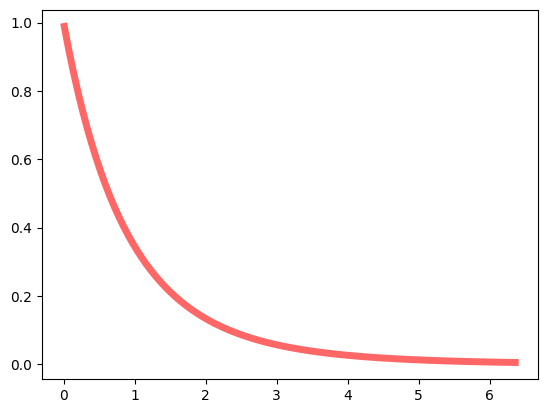

In [75]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

Let’s say we set alpha, which the level of significance, equal to 5%. The corresponding F-critical value is 3.68. Hence:

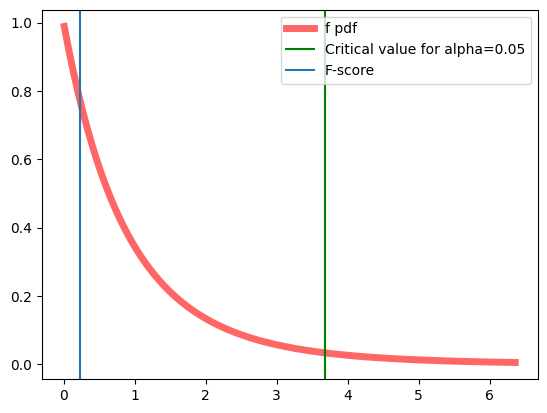

In [76]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

**We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.**

In [77]:
###########################################################################################################################

### Classwork1

In [90]:
import pandas as pd
import numpy as np
from scipy.stats import f

g1=[5,9,10,12,8,8,9]
g2=[5,4, 4, 5,5,4,8]
g3=[9,8, 5, 6,7,7,6]

df = pd.DataFrame.from_dict({'g1': [5,9,10,12,8,8,9], 
                        'g2': [5,4, 4, 5,5,4,8], 
                        'g3': [9,8, 5, 6,7,7,6]})

df

,g1,g2,g3
0,5,5,9
1,9,4,8
2,10,4,5
3,12,5,6
4,8,5,7
5,8,4,7
6,9,8,6


In [91]:
m1=np.mean(g1)
m2=np.mean(g2)
m3=np.mean(g3)

print('Average mark for college G1: {}'.format(m1))
print('Average mark for college G2: {}'.format(m2))
print('Average mark for college G3: {}'.format(m3))

Average mark for college G1: 8.714285714285714
Average mark for college G2: 5.0
Average mark for college G3: 6.857142857142857


In [92]:
m=(m1+m2+m3)/3 
print('Overall mean: {}'.format(m))

Overall mean: 6.857142857142857


In [93]:
SSb=7*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 48.28571428571427


In [94]:
MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 24.142857142857135


In [95]:
err_1=list(g1-m1)
err_2=list(g2-m2)
err_3=list(g3-m3)
err=err_1 + err_2 + err_3
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 50.285714285714285


In [99]:
MSw=SSw/18
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 2.7936507936507935


In [100]:
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 8.642045454545451


In [101]:
stats.f_oneway(g1,g2,g3) 

F_onewayResult(statistic=8.642045454545455, pvalue=0.0023401416952062546)

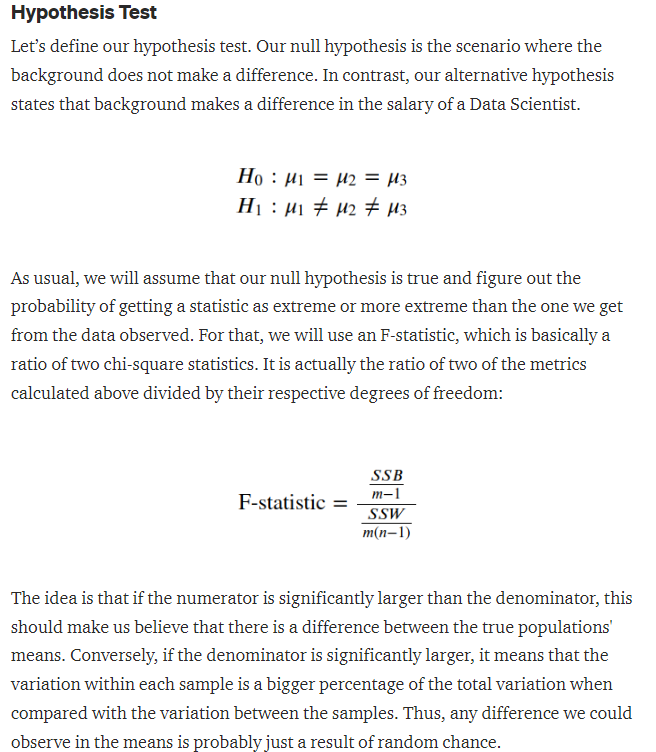

In [79]:
#########################################################################################################################

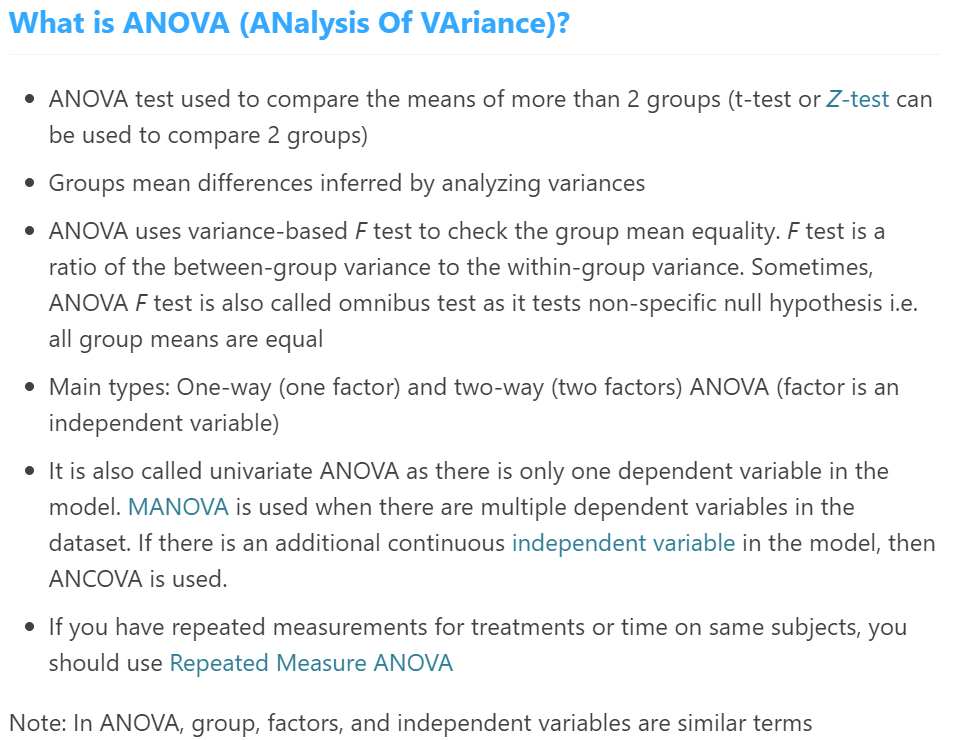

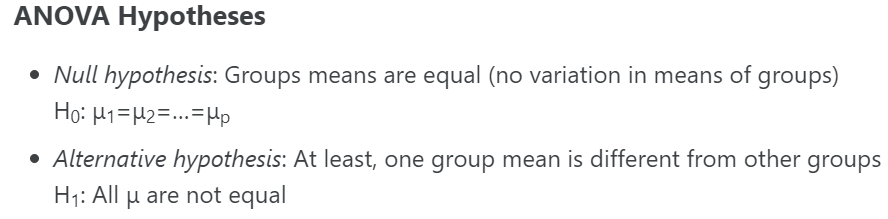

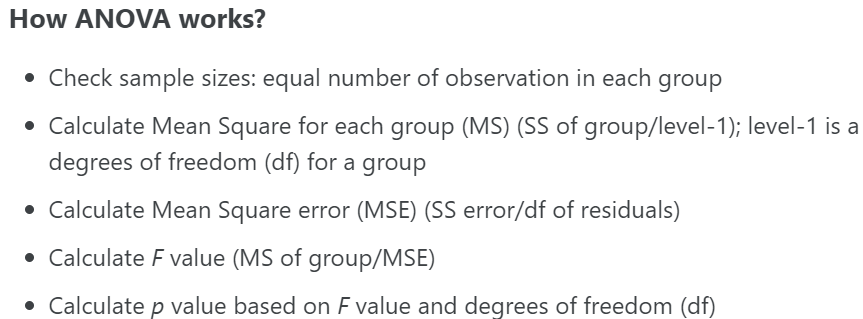

In [80]:
################################################################################################################################

### Classwork2

### dataset https://www.reneshbedre.com/assets/posts/anova/onewayanova.txt

In [102]:
import pandas as pd
import numpy as np
from scipy.stats import f

A=[25,30,28,36,29]
B=[45,55,29,56,40]
C=[30,29,33,37,27]
D=[54,60,51,62,73]

df = pd.DataFrame.from_dict({'A': [25,30,28,36,29], 
                        'B': [45,55,29,56,40], 
                        'C': [30,29,33,37,27],
                        'D': [54,60,51,62,73]})

df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [103]:
m1=np.mean(A)
m2=np.mean(B)
m3=np.mean(C)
m4=np.mean(D)



print('Average mark for A: {}'.format(m1))
print('Average mark for B: {}'.format(m2))
print('Average mark for C: {}'.format(m3))
print('Average mark for D: {}'.format(m4))

Average mark for A: 29.6
Average mark for B: 45.0
Average mark for C: 31.2
Average mark for D: 60.0


In [104]:
m=(m1+m2+m3+m4)/4 
print('Overall mean: {}'.format(m))

Overall mean: 41.45


In [105]:
SSb=5*((m1-m)**2+(m2-m)**2+(m3-m)**2+(m4-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 3010.9500000000003


In [112]:
MSb=SSb/3
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 1003.6500000000001


In [113]:
err_1=list(A-m1)
err_2=list(B-m2)
err_3=list(C-m3)
err_4=list(D-m4)
err=err_1 + err_2 + err_3 + err_4
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 918.0


In [114]:
MSw=SSw/16
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 57.375


In [115]:
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 17.49281045751634


In [116]:
stats.f_oneway(A,B,C,D) 

F_onewayResult(statistic=17.492810457516338, pvalue=2.6392411462109217e-05)